
# Scripting Week 7: Pandas Wrap-up

In [2]:
import pandas as pd

## Announcements

## For next week...

* Bring you final project questions to class next - I can help during the lab time!

* Have your data collected and figured out! You don't want to get to the deadline only to realize that you can't get the data the way you want! (This is graded, for 20pts)

## Review

### Thing you should know.

Take a moment to consider this list: if you don't know how to answer a question, you're falling behind.

- What is a list in Python?
- How do you get a single item out of a list?
- What is a variable?
- How do you set a variable?
- What is a comparison? What logical operators can you use?
- What is a series?
- How do you make a subset of a series based on a comparison?
- What is a DataFrame?
- How do you select one column of a DataFrame? How do you select two columns of a DataFrame?
- How do you select rows based on a single comparison?
- Explain Split-Apply-Combine.
- How do you do split-apply-combine in Pandas?
- How do you take the means per group for a dataset? How do you do this for multiple groups? How do you get the median, standard deviation, or count?
- What does value_counts do? Explain with specificity: what does it run on, and what exactly is the output?

### Other Things we've learned

- Notebooks - don't underappreciate the value of being comfortable in this environment
- loops
- SQL Fundamentals: SELECT, WHERE, LIMIT, ORDER BY
- SQL concepts
- JOINS
- containers - different philosophical approaches to hold groups of stuff: e.g. named, ordered, unique, mutable
- drop_duplicates()
- isin()
- methods, arguments, named arguments
- reading out of databases with data science tools
- read_csv, to_csv
- reading tables from the web with read_html

Load sample data:

In [3]:
movies = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/movielens_small.csv')
df = movies.sample(n=5, random_state=12345).set_index('title') 

In [4]:
df

,userId,rating,genres,timestamp,year
title,,,,,
Bringing Up Baby,481,4.0,Comedy,1437001472,1938
"Long, Hot Summer, The",311,3.5,Drama,1061927755,1958
"Net, The",191,3.0,Action,839925608,1995
City Lights,648,4.5,Comedy,1176754888,1931
Eagle vs Shark,132,4.0,Comedy,1284496709,2007


How would you select:
    
- Rows 2:4
- The first, second, and fifth rows
- The columns `genres` and `year`
- The column `genres` as a Series
- The column `genres` as a DataFrame
- The rows where the year is `> 1990`
- The rows where the `genres` value is `Action` or `Drama`
- New skill:
    - The row titled "City Lights"

### Selecting DataFrames

Everything follows the pattern:

`df[ ... ]`

Except selecting rows by index name, which uses:

`df.loc[ ... ]`

**Selecting rows by numeric index**

Provide `x:y` notation in : `df[10:14]`

**Selecting rows by index name**

Provide the name to `.loc[]`: `df.loc['Sherlock Holmes']`

**Selecting rows by inclusion criteria**

Provide any collection (e.g. a list or Series) of True/False values:

```
df[[True, False, False, True, True]]
```

```
df[df.year > 1996]
```

**Selecting multiple columns**

Provide a collection of strings, referencing the column names:

```
df[['genres', 'year']]
```
    
**Selecting single column (as Series)**

```
df['year']
```

Or:

```
df.year
```

Consider the latter as the shortcut, not the main way.

The output is a Series. To select a single column as a DataFrame, use list with only one value.

## Selecting by Index
    
In addition to passing a string to `.loc[]`:

In [3]:
df.loc['City Lights']

userId              648
rating              4.5
genres           Comedy
timestamp    1176754888
year               1931
Name: City Lights, dtype: object

You can pass a list of index names:

In [4]:
df.loc[['City Lights', 'Bringing Up Baby']]

,userId,rating,genres,timestamp,year
title,,,,,
City Lights,648,4.5,Comedy,1176754888,1931
Bringing Up Baby,481,4.0,Comedy,1437001472,1938


### Setting and resetting an index:

In [5]:
df2 = df.reset_index()
df2

,title,userId,rating,genres,timestamp,year
0,Bringing Up Baby,481,4.0,Comedy,1437001472,1938
1,"Long, Hot Summer, The",311,3.5,Drama,1061927755,1958
2,"Net, The",191,3.0,Action,839925608,1995
3,City Lights,648,4.5,Comedy,1176754888,1931
4,Eagle vs Shark,132,4.0,Comedy,1284496709,2007


In [6]:
df2.set_index('genres')

,title,userId,rating,timestamp,year
genres,,,,,
Comedy,Bringing Up Baby,481,4.0,1437001472,1938
Drama,"Long, Hot Summer, The",311,3.5,1061927755,1958
Action,"Net, The",191,3.0,839925608,1995
Comedy,City Lights,648,4.5,1176754888,1931
Comedy,Eagle vs Shark,132,4.0,1284496709,2007


In [7]:
df3 = df2.set_index(['genres', 'title']).sort_index()
df3

userId  rating   timestamp  year
genres title                                                  
Action Net, The                  191     3.0   839925608  1995
Comedy Bringing Up Baby          481     4.0  1437001472  1938
       City Lights               648     4.5  1176754888  1931
       Eagle vs Shark            132     4.0  1284496709  2007
Drama  Long, Hot Summer, The     311     3.5  1061927755  1958

In [8]:
df3.loc[('Comedy')]

,userId,rating,timestamp,year
title,,,,
Bringing Up Baby,481,4.0,1437001472,1938
City Lights,648,4.5,1176754888,1931
Eagle vs Shark,132,4.0,1284496709,2007


In [9]:
df3.loc[('Comedy', 'City Lights')]

userId       6.480000e+02
rating       4.500000e+00
timestamp    1.176755e+09
year         1.931000e+03
Name: (Comedy, City Lights), dtype: float64

## Class Exercise

In groups of two, load the US temperatures dataset uploaded to `https://colab.research.google.com/github/organisciak/Scripting-Course/blob/master/labs/US_Temperatures_Scripting_Class_Exercises.ipynb`.

We'll be competing to who can get the most questions answered. You *don't* have to complete all the questions, nor complete them in order.

# Advanced Skills


## Python - Running Scripts

1. Save a notebook as a script:
    ![](../images/save-as.png)
2. On the command line: `python name_of_script.py`
    - You may need to navigate to the correct folder with `cd /path/to/folder/name`
    - You may need to install Python on your computer to do so.
    
*Notebooks are good for interaction, `.py` script files are good for repetition*

## File Paths

`.` - Current folder

`..` - Parent folder

`folder1/folder2` - Directory named `folder2`, within a `folder1` directory, within the current directory

`../data` - Go up one directory, then into the 'data' folder

## `groupby(...).apply()`

*Custom 'apply' steps for split-apply-combine

In [ ]:
import pandas as pd
example = pd.DataFrame({'A': 'a a b'.split(), 'B': [1,2,3], 'C': [4,6, 5]})
example

In [ ]:
def difference(x):
    return x['C'].max() - x['B'].min()

example.groupby('A').apply(difference)

## Pandas <-> SQL Skills Transfer

[Pandas Documentation: Comparison with SQL](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

![](../images/sql-skills.png)

## Pandas Skills - Rolling Means and Working with Data Types

<AxesSubplot:xlabel='DATE'>

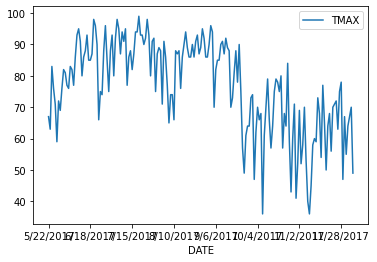

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/weather-example.csv')
df.plot(x='DATE', y='TMAX')

## Rolling means

Column:

```
df.columnName.rolling(window, min_periods=None, on=None, axis=0, closed=None).mean()
```

In [6]:
df['TMAX'].rolling(window=7).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
178    65.285714
179    64.142857
180    64.714286
181    64.000000
182    59.857143
Name: TMAX, Length: 183, dtype: float64

Easier to compare as a new column of the DataFrame:

In [7]:
df['rolling_max'] = df.TMAX.rolling(window=7).mean()
df.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_max
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,NaN
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,NaN
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62,NaN
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52,NaN
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51,NaN
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47,NaN
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53,70.142857
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53,70.428571
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56,72.285714
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61,72.142857


In [8]:
df['rolling_max'] = df.TMAX.rolling(window=7, min_periods=1).mean()
df.head(15)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_max
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,67.000000
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,65.000000
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62,71.000000
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52,72.250000
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51,72.000000
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47,69.833333
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53,70.142857
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53,70.428571
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56,72.285714
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61,72.142857


<AxesSubplot:xlabel='DATE'>

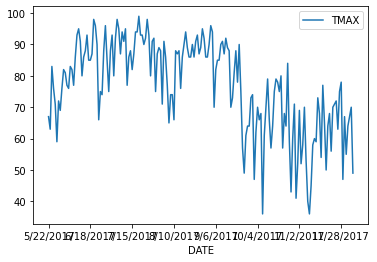

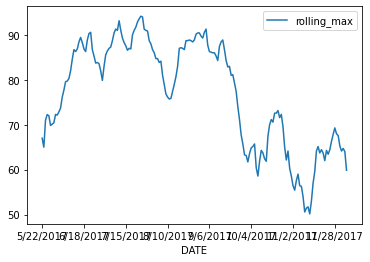

In [9]:
df.plot(x='DATE', y='TMAX')
df.plot(x='DATE', y='rolling_max')

<AxesSubplot:xlabel='DATE'>

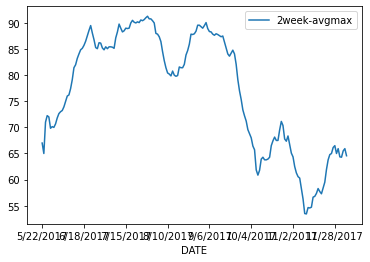

In [10]:
df['2week-avgmax'] = df.TMAX.rolling(window=7*2, min_periods=1).mean()
df.plot(x='DATE', y='2week-avgmax')

## Data types

Pandas tries to figure out the datatype automatically: integer, float, string, object (i.e. mix of various), boolean.

In [11]:
df.dtypes

STATION          object
NAME             object
DATE             object
PRCP            float64
SNOW            float64
SNWD            float64
TMAX              int64
TMIN              int64
TOBS              int64
rolling_max     float64
2week-avgmax    float64
dtype: object

## Working with dates and time

The 'Date' column is not recognized as dates. Convert it with `pd.to_datetime(column)` -- Then Pandas can work more smartly.

Here's some fake data, with 5 data points from May and 5 from July: (note a *separate* bonus skill, `pd.concat`, which can combine multiple dataframes into 1)

,DATE,TMAX
3,5/25/2017,76
4,5/26/2017,71
40,7/4/2017,92
41,7/5/2017,98


<AxesSubplot:xlabel='DATE'>

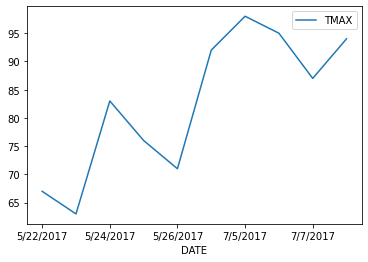

In [13]:
fake_data = pd.concat([df[0:5], df[40:45]])
print(fake_data[['DATE', 'TMAX']][3:7])
fake_data.plot(x='DATE', y='TMAX')

#### Problem: *Since Pandas doesn't realize that 'DATE' is a date column, it doesn't show the proper spacing between 5/26 and 7/4*

In [14]:
pd.to_datetime(df['DATE'])

0     2017-05-22
1     2017-05-23
2     2017-05-24
3     2017-05-25
4     2017-05-26
         ...    
178   2017-12-01
179   2017-12-02
180   2017-12-03
181   2017-12-04
182   2017-12-05
Name: DATE, Length: 183, dtype: datetime64[ns]

Look at the 'dtype' at the bottom!

Set it to a new column, or overwrite the existing column. Here, I'm setting to 'new_date' for clarity.

In [32]:
df['new_date'] = pd.to_datetime(df.DATE)
df.head(2)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_max,2week-avgmax,new_date
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,67.0,67.0,2017-05-22
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,65.0,65.0,2017-05-23


In [20]:
df.dtypes

STATION                 object
NAME                    object
DATE                    object
PRCP                   float64
SNOW                   float64
SNWD                   float64
TMAX                     int64
TMIN                     int64
TOBS                     int64
rolling_max            float64
2week-avgmax           float64
new_date        datetime64[ns]
dtype: object

         DATE   new_date  TMAX
3   5/25/2017 2017-05-25    76
4   5/26/2017 2017-05-26    71
40   7/4/2017 2017-07-04    92
41   7/5/2017 2017-07-05    98


<AxesSubplot:xlabel='new_date'>

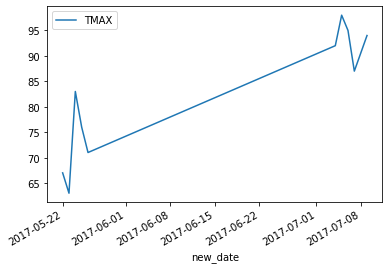

In [33]:
fake_data = pd.concat([df[0:5], df[40:45]])
print(fake_data[['DATE', 'new_date', 'TMAX']][3:7])
fake_data.plot(x='new_date', y='TMAX')

## Better!

With a proper date column:
    
- `rolling` will be more accurate, especially with less neat intervals than our weather data
  - e.g. `df.col1.rolling('2w')`, `df.col1.rolling('20m')`
- Can select substrings by date
  - e.g. return June 2017 - Sept 2017
- Proper intervals in plots
- Easy conversion of timezones
- Easy convert from datetime field to custom strings; by month, or year, or minute, etc.

Documentation: [Time Series / Date functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)